In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prjt2/wine.csv')
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [25]:
data.isnull().sum()

,0
Alcohol,0
Malic_acid,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0
Color_intensity,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [27]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [28]:

sns.pairplot(data=data, hue='WineVariety')

Output hidden; open in https://colab.research.google.com to view.

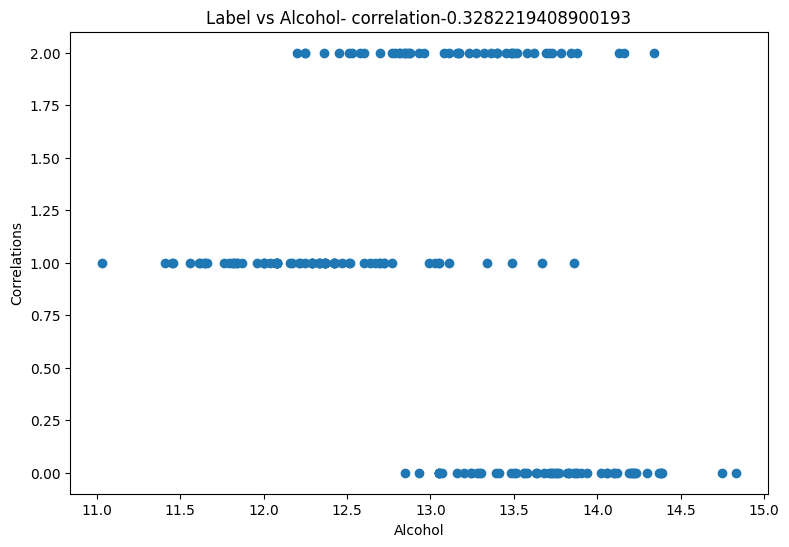

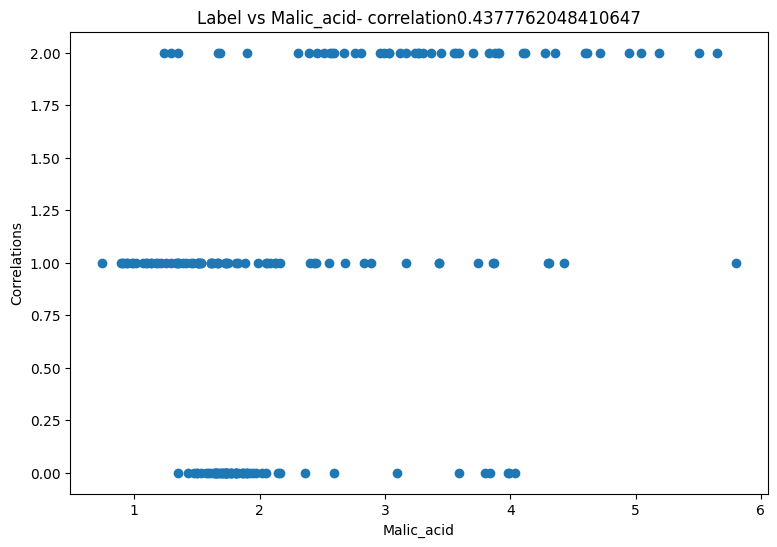

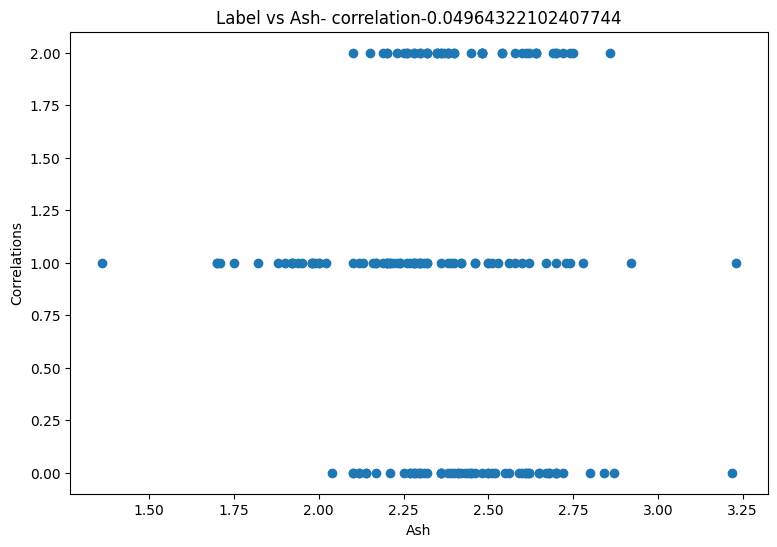

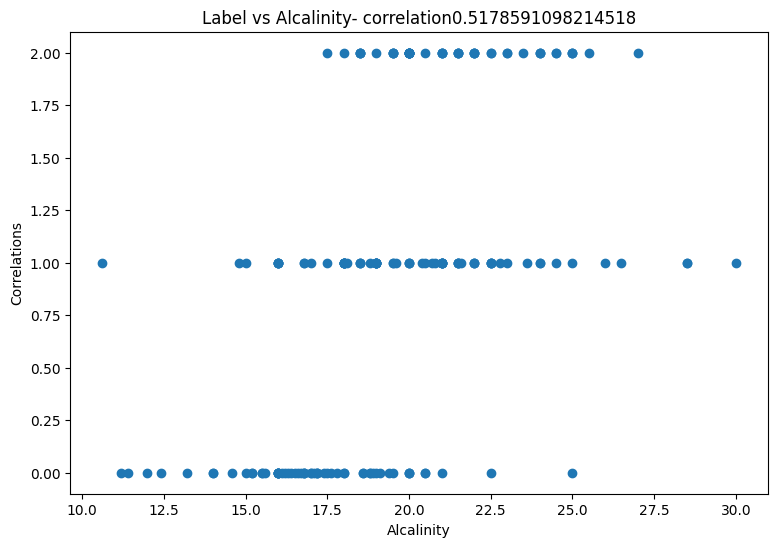

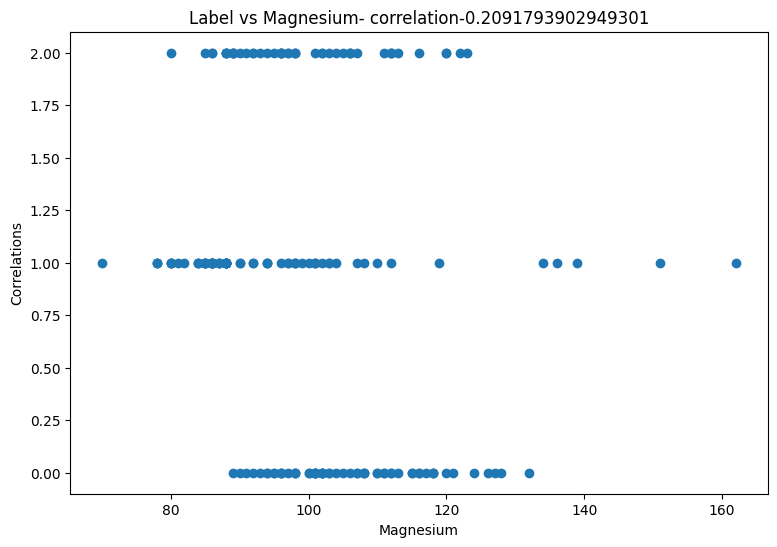

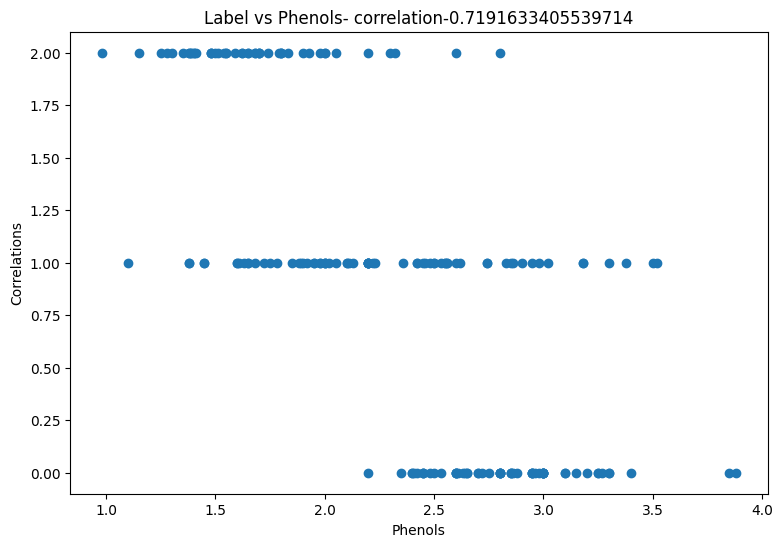

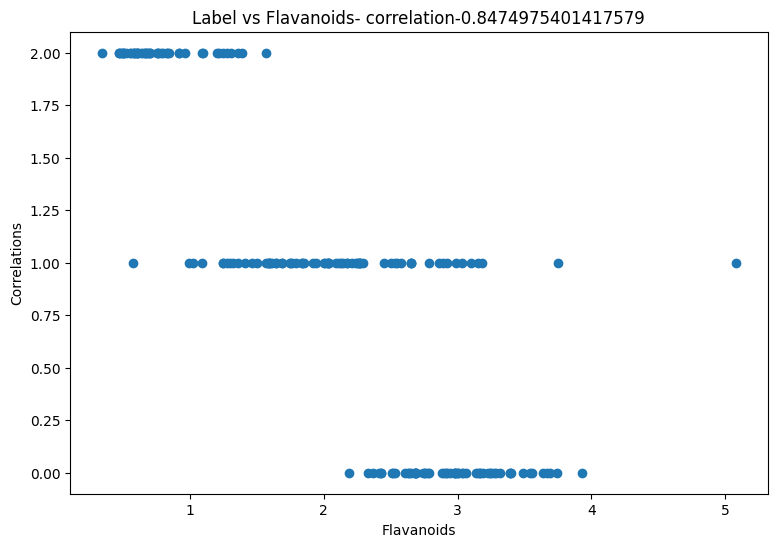

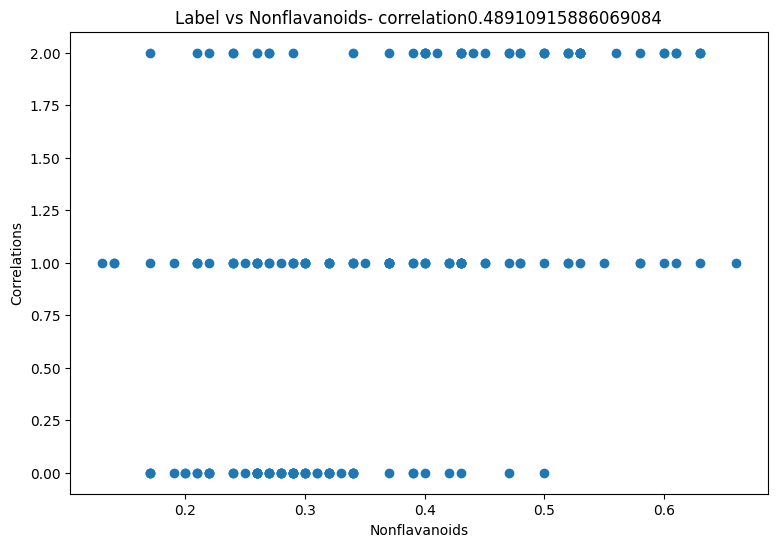

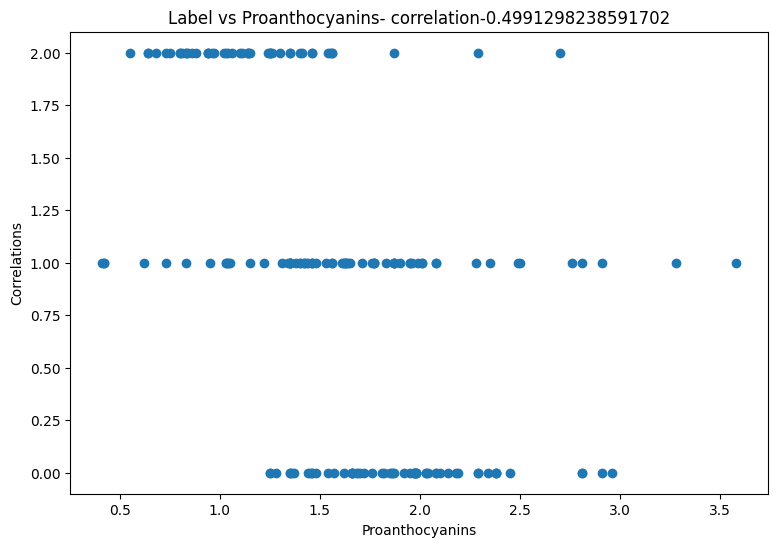

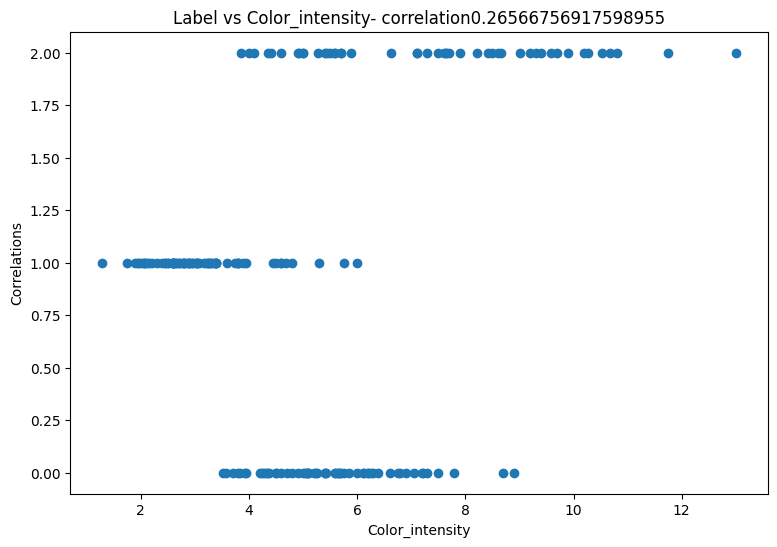

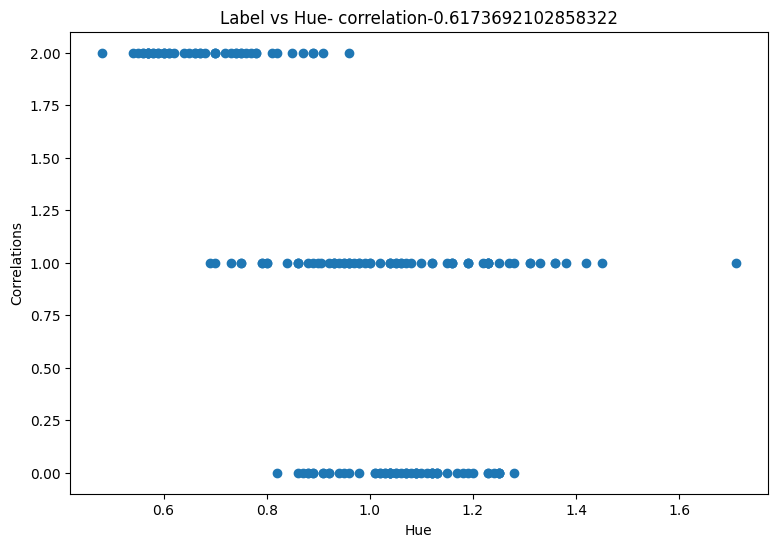

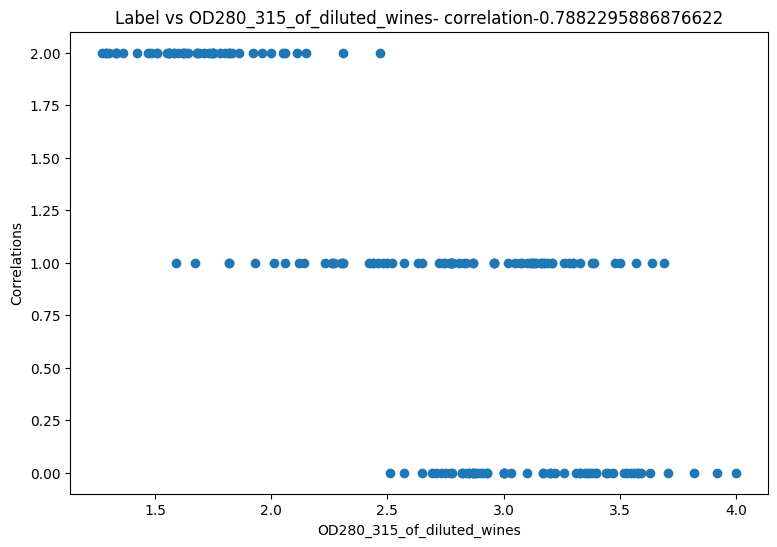

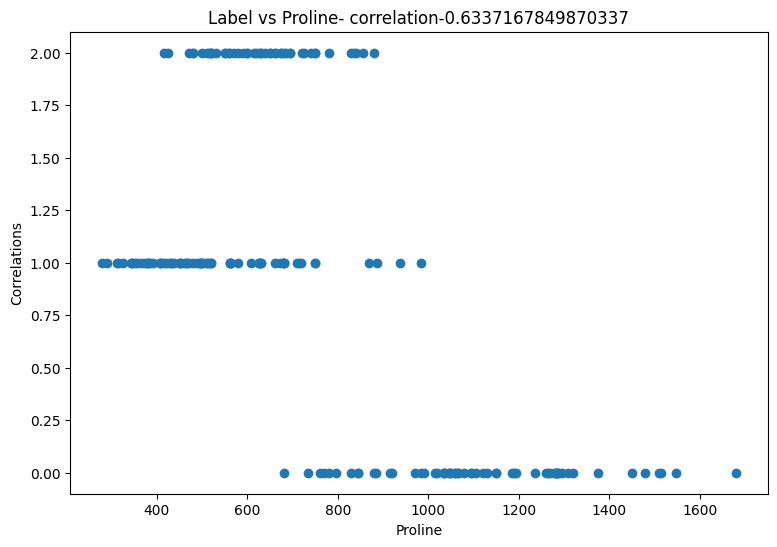

In [29]:
features= ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids','Nonflavanoids','Proanthocyanins', 'Color_intensity', 'Hue','OD280_315_of_diluted_wines', 'Proline'  ]
label = 'WineVariety'

label = data[label]

for col in features:
  fig = plt.figure (figsize=(9,6))
  ax = fig.gca()
  info = data[col]
  correlation = info.corr(label)
  plt.scatter(x=info, y=label)
  plt.xlabel(col)
  plt.ylabel('Correlations')
  ax.set_title('Label vs ' + col + '- correlation' + str(correlation))
plt.show()

In [30]:
features = [0,1,3,4,6,7,8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier())])



model = pipeline.fit(x_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4, 6, 7, 8, 9, 10,
                                                   11, 12])])),
                ('regressor', RandomForestClassifier())])


In [31]:

X,y = data[data.columns[0:-1]], data[data.columns[-1]]

x_train, x_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0, stratify=y)
print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 124, Test Set: 54 



In [32]:


model = RandomForestClassifier().fit(x_train, y_train)

print(model)

RandomForestClassifier()


In [33]:
predictions = model.predict(x_test).round()
print("Predicted labels: ", predictions[:20])
print("Actual labels: ", y_test[:20])

Predicted labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2 2 0 0 2 1]
Actual labels:  53     0
64     1
6      0
1      0
98     1
157    2
77     1
166    2
54     0
148    2
12     0
97     1
164    2
9      0
160    2
152    2
24     0
39     0
147    2
95     1
Name: WineVariety, dtype: int64


In [34]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [35]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Accuracy score:  1.0
Overall Precision: 1.0
Overall Recall: 1.0


In [36]:

cm = confusion_matrix(y_test, predictions)
print(cm)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


In [37]:
filename = './wine_classifer_RandomForest.pkl'
joblib.dump(model, filename)

['./wine_classifer_RandomForest.pkl']

In [38]:




features = [0,1,3,4,6,7,8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC( probability=True))])



model = pipeline.fit(x_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4, 6, 7, 8, 9, 10,
                                                   11, 12])])),
                ('regressor', SVC(probability=True))])


In [39]:
predictions2 = model.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, predictions2))
print("Overall Precision:",precision_score(y_test, predictions2, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions2, average='macro'))


Accuracy score:  1.0
Overall Precision: 1.0
Overall Recall: 1.0


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


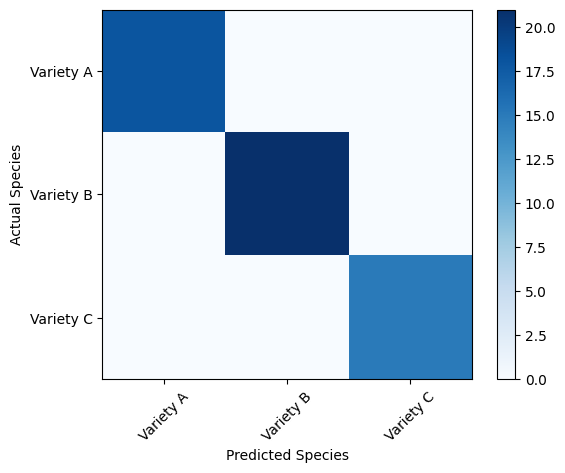

In [40]:

prob = model.predict_proba(x_test)


print("Overall Accuracy:", accuracy_score(y_test, predictions2))
print("Overall Precision:", precision_score(y_test, predictions2, average='macro'))
print("Overall Recall:", recall_score(y_test, predictions2, average='macro'))
print('Average AUC:', roc_auc_score(y_test,prob, multi_class="ovr"))

classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Average AUC: 1.0


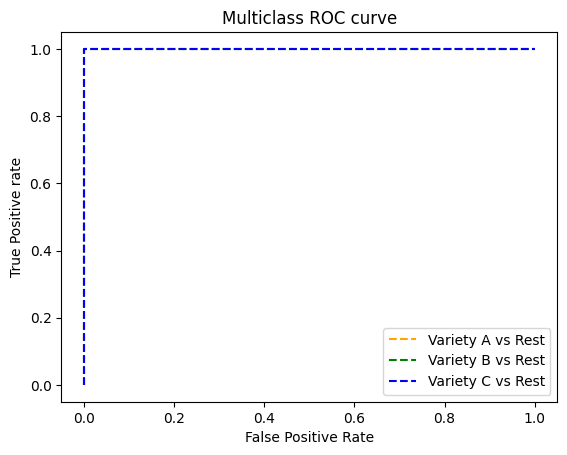

In [41]:


probabilities = model.predict_proba(x_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)


fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)


plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [42]:



filename = './wine_classifer_SVC.pkl'
joblib.dump(model, filename)


model = joblib.load(filename)


x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

#
predictions = model.predict(x_new)


for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
